In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv(r"C:\Users\RenukaHebasur\Downloads\netflix_titles.csv") 
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [41]:
df['director'].fillna('Unknown', inplace=True)  # Fill missing director with 'Unknown'
df['cast'].fillna('Unknown', inplace=True)  # Fill missing cast with 'Unknown'
df['country'].fillna('Unknown', inplace=True)  # Fill missing country with 'Unknown'
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)  # Fill with most frequent date
df['rating'].fillna('No Rating', inplace=True)  # Fill missing rating with 'No Rating'
df.dropna(subset=['director', 'cast'], inplace=True)  # Drop rows where director or cast is missing
df['duration'].fillna(df['duration'].mode()[0], inplace=True)  # Fill with most frequent duration

In [37]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


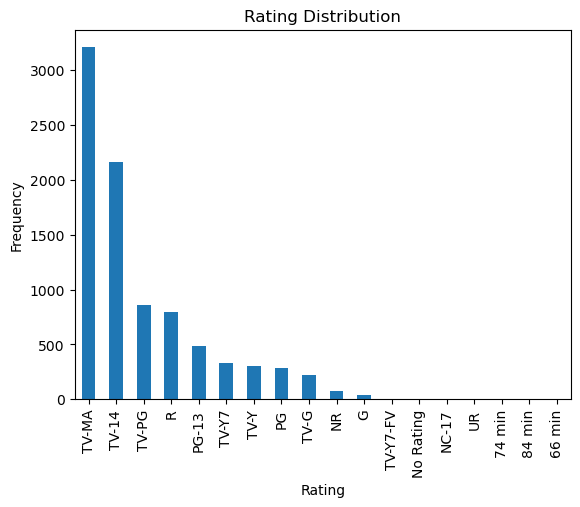

<Figure size 640x480 with 0 Axes>

In [91]:
df['rating'].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Rating')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Rating Distribution')  # Title of the plot

# Display the plot
plt.show()
plt.savefig('Netflix/rating_distribution.png')

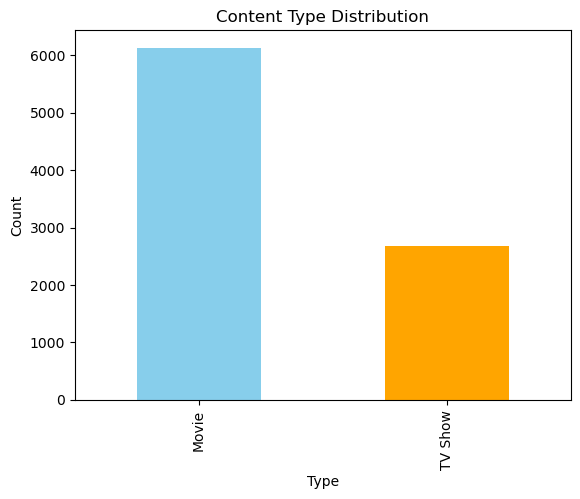

<Figure size 640x480 with 0 Axes>

In [93]:
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
plt.savefig('Netflix/Content_Type_Distribution.png')


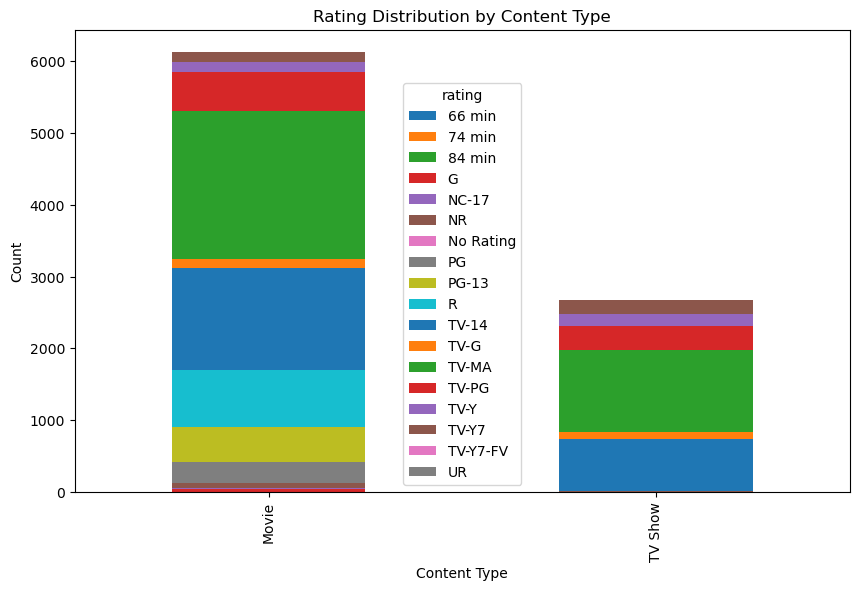

<Figure size 640x480 with 0 Axes>

In [95]:
df.groupby('type')['rating'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Rating Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()
plt.savefig('Netflix/rating_distribution_by_Content_type.png')


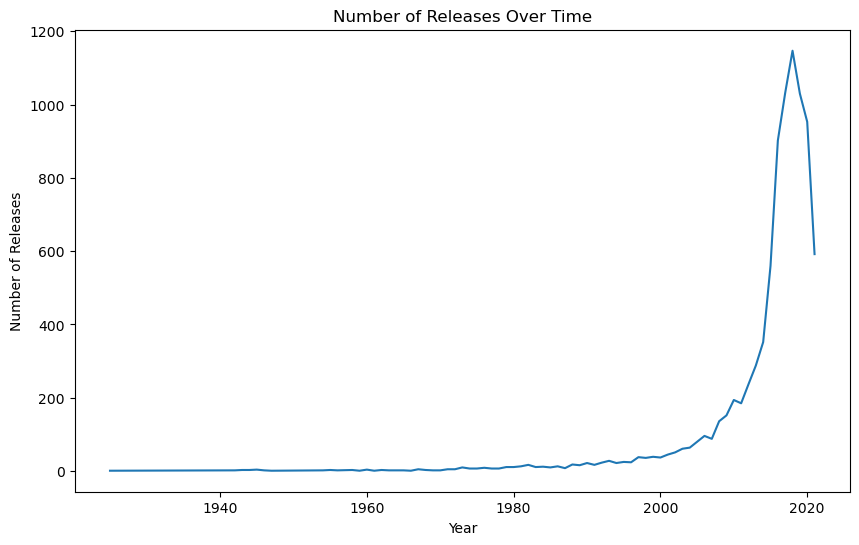

<Figure size 640x480 with 0 Axes>

In [97]:
df['release_year'] = df['release_year'].astype(int)  # Ensure it's treated as an integer
df.groupby('release_year')['title'].count().plot(kind='line', figsize=(10,6))
plt.title('Number of Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()
plt.savefig('Netflix/Number of Releases.png')


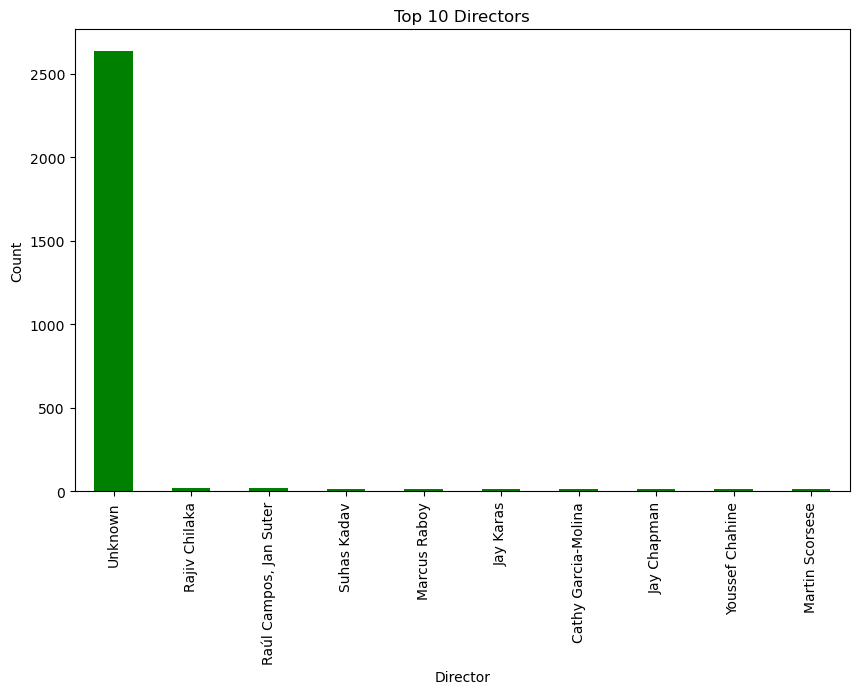

<Figure size 640x480 with 0 Axes>

In [99]:
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='green', figsize=(10,6))
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()
plt.savefig("Netflix/Top_10_Directores")



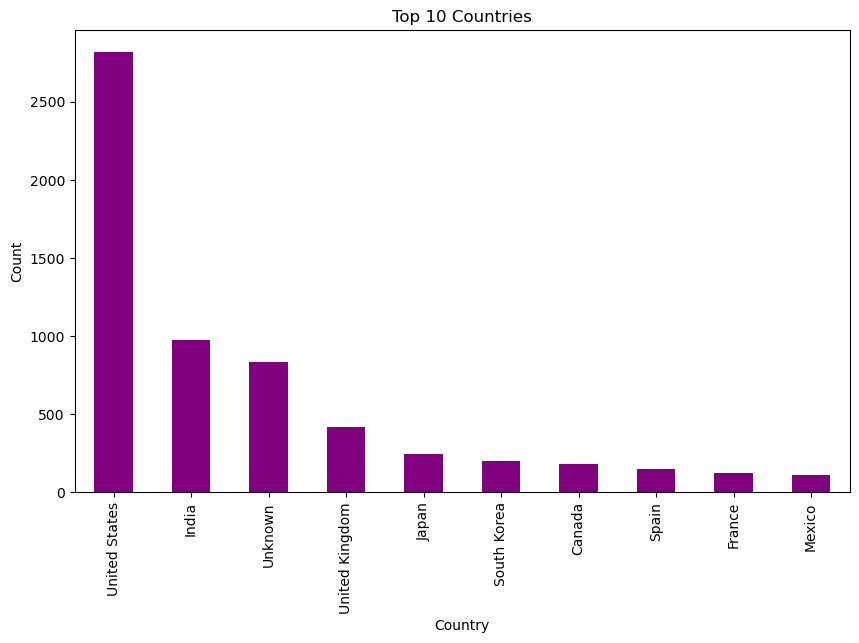

<Figure size 640x480 with 0 Axes>

In [101]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='purple', figsize=(10,6))
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()
plt.savefig("Netflix/Top_10_Countries")


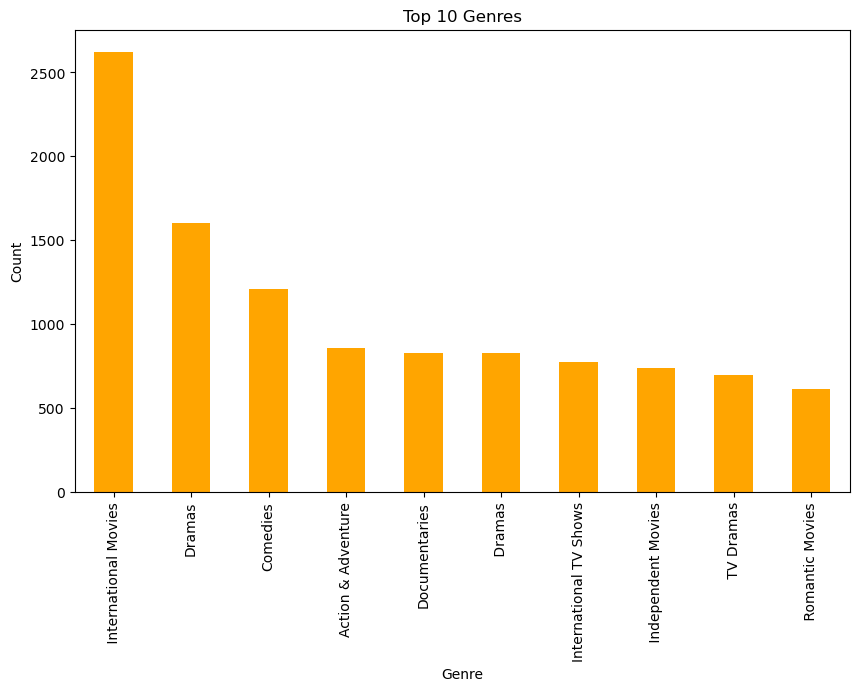

<Figure size 640x480 with 0 Axes>

In [103]:
genre_count = df['listed_in'].str.split(',').explode().value_counts().head(10)
genre_count.plot(kind='bar', color='orange', figsize=(10,6))
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()
plt.savefig("Netflix/Top_10_Genres")
